## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
im = cv2.imread('elephant.jpg') # read an image in BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_image=im.shape
print(im.shape)

(330, 500, 3)


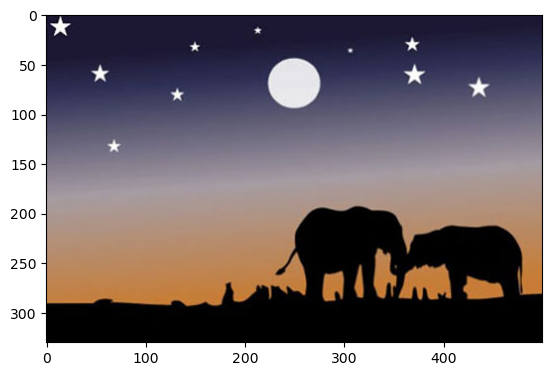

In [4]:
plt.imshow(im)
plt.show()

In [5]:
# flatten each channel of the image in linear array 

all_pixels = im.reshape((330*500, 3))
print(all_pixels.shape)

# one linear array for each color, (red , green , and blue channel)

(165000, 3)


In [6]:
from sklearn.cluster import KMeans

In [14]:
km = KMeans(n_clusters=4)
km.fit(all_pixels)

C:\Users\KIIT01\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [8]:
centers = km.cluster_centers_
centers = np.array(centers, dtype='uint8')
print(centers)

[[ 37  35  64]
 [174 145 128]
 [ 98  94 117]
 [  1   0   1]]


# Plot all colors 

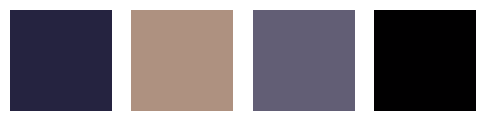

In [9]:
plt.figure(0,figsize=(6,2))

i=1

colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    
    colors.append(each_col)
    
    # Color swatch 
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()

# Segmenting Our Original Image

In [10]:
new_img = np.zeros((330*500, 3), dtype='uint8')

print(new_img.shape)

(165000, 3)


In [11]:
colors

[array([37, 35, 64], dtype=uint8),
 array([174, 145, 128], dtype=uint8),
 array([ 98,  94, 117], dtype=uint8),
 array([1, 0, 1], dtype=uint8)]

In [12]:
km.labels_

array([0, 0, 0, ..., 3, 3, 3])

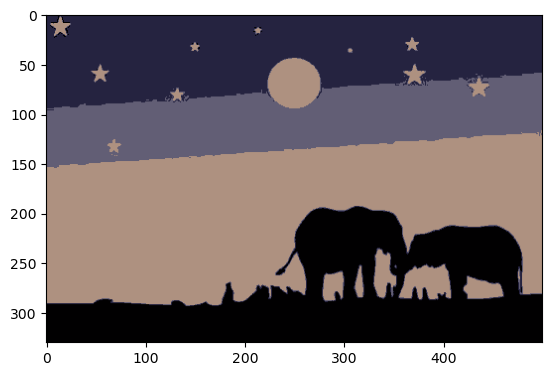

In [13]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]
# print(original_image)    
    
new_img = new_img.reshape((original_image))
# print(new_img.shape)
plt.imshow(new_img)
plt.show()